# Домашнее задание 1

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## Часть 1: анализ графа

Откройте с помощью `networkx.read_gml` файл `netscience.gml` из задания на Gephi, при этом не указывайте при импорте “label=None”, чтобы нормально загрузились имена учёных — метки вершин.

In [2]:
G = nx.read_gml(path='/content/netscience.gml')

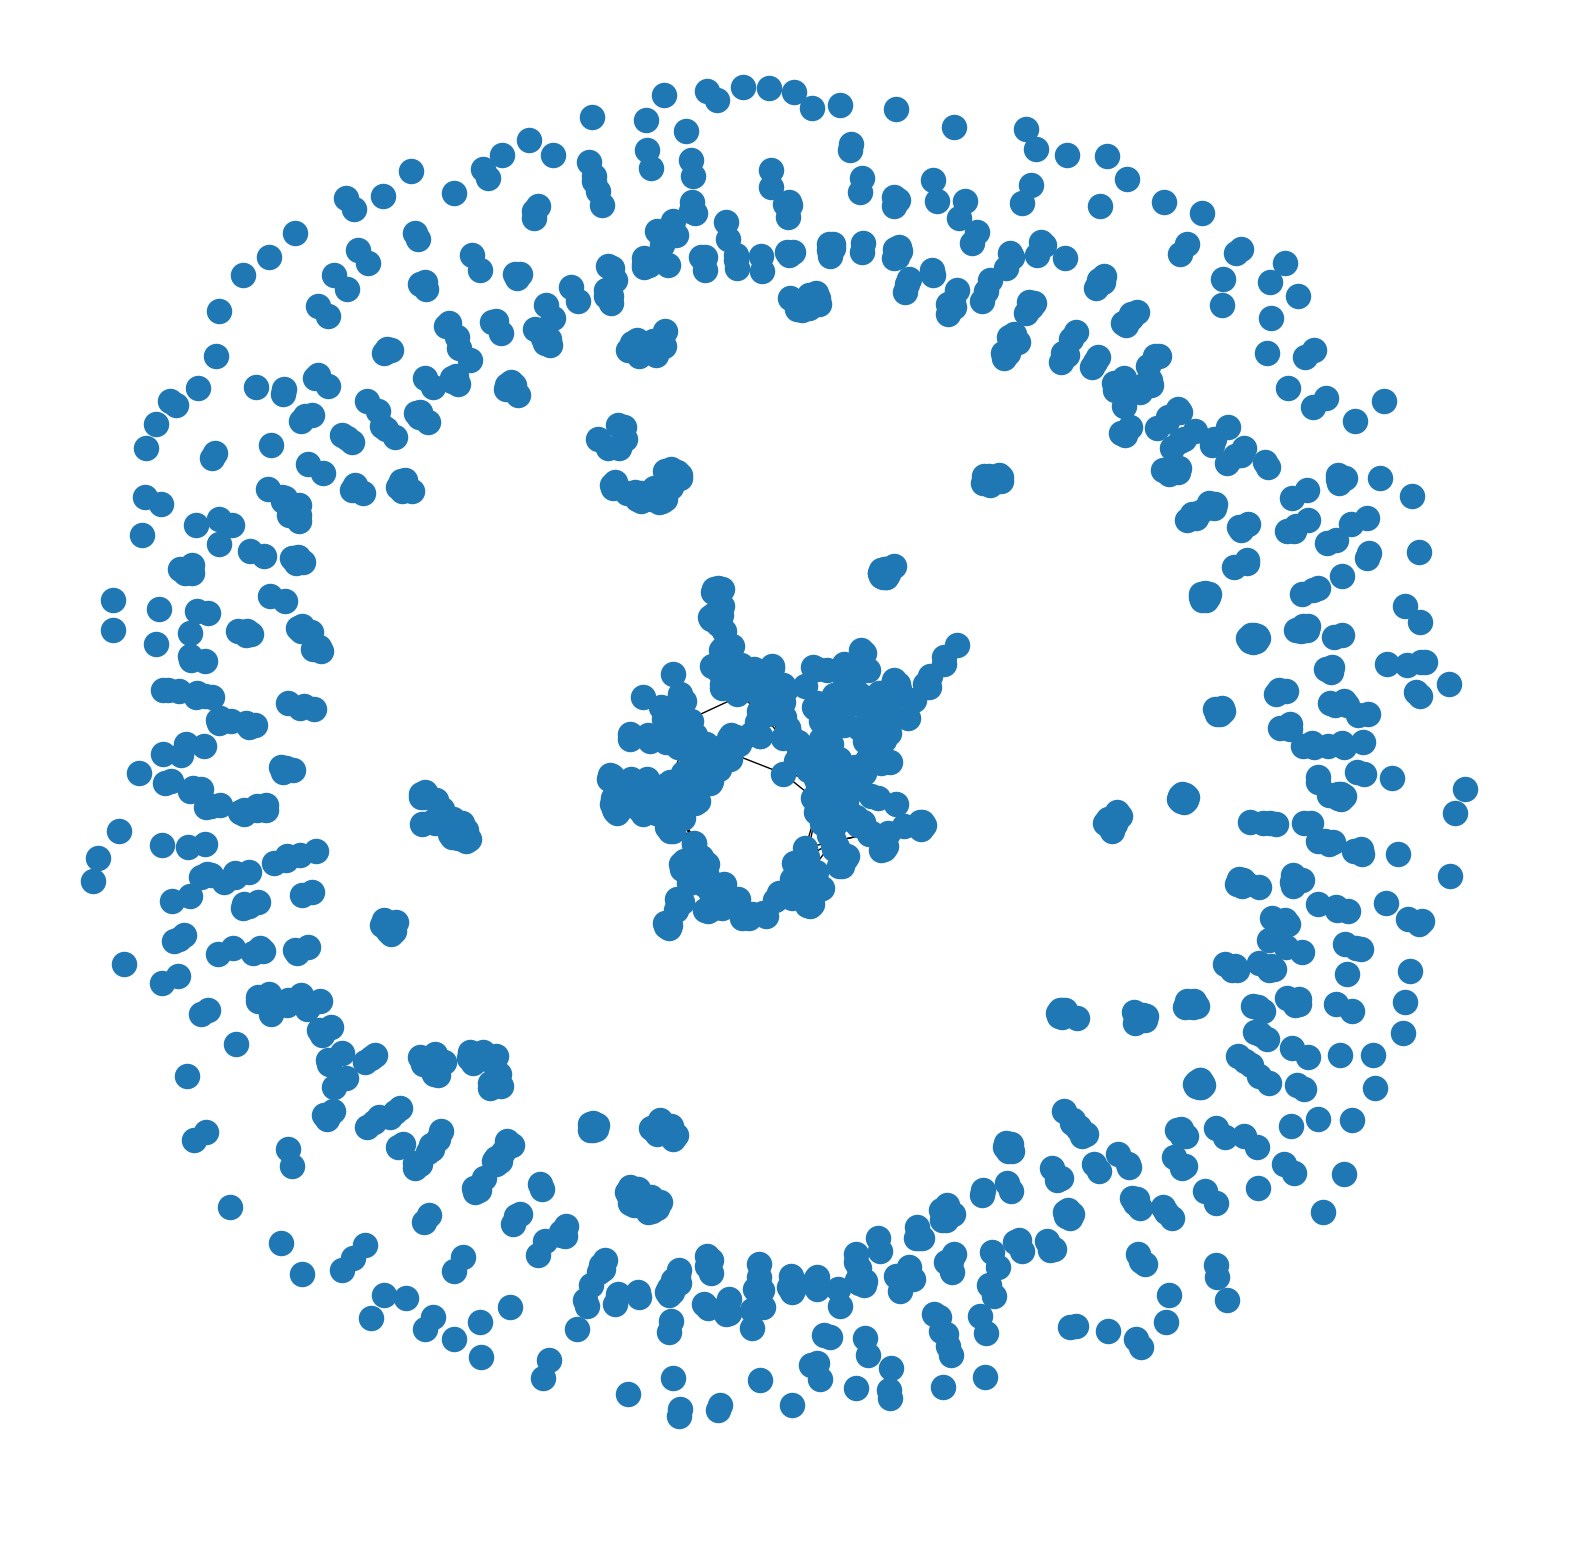

In [3]:
plt.subplots(figsize=(20, 20))
nx.draw(G)

Средствами `networkx` выведите (сделайте `print` количество вершин и рёбер графа.

In [4]:
print('Количество вершин:', G.number_of_nodes())
print('Количество ребер:', G.number_of_edges())

Количество вершин: 1589
Количество ребер: 2742


Средствами `networkx` найдите количество вершин в самой большой компоненте связности графа.

In [5]:
print('Количество вершин в самой большой компоненте связности графа:', \
      len(sorted(nx.connected_components(G), key=len, reverse=True)[0]))

Количество вершин в самой большой компоненте связности графа: 379


Сколько изолированных вершин в графе?

In [6]:
isolated = [i for i in range(len(list(nx.connected_components(G)))) \
     if len(sorted(nx.connected_components(G), key=len, reverse=True)[i]) == 1]
print('Количество изолированных вершин в графе:', len(isolated))

Количество изолированных вершин в графе: 128


Нарисуйте с помощью `networkx.draw_spring` единственную 21-вершинную компоненту связности графа. Может пригодиться метод `subgraph`, возвращающий подграф заданного графа, порождённый заданным множеством вершин.

In [7]:
comps = sorted(nx.connected_components(G), key=len, reverse=True)
idx = 0
for i, comp in enumerate(comps):
    if len(comp) == 21:
        idx = i
idx, len(comps[idx])

(4, 21)

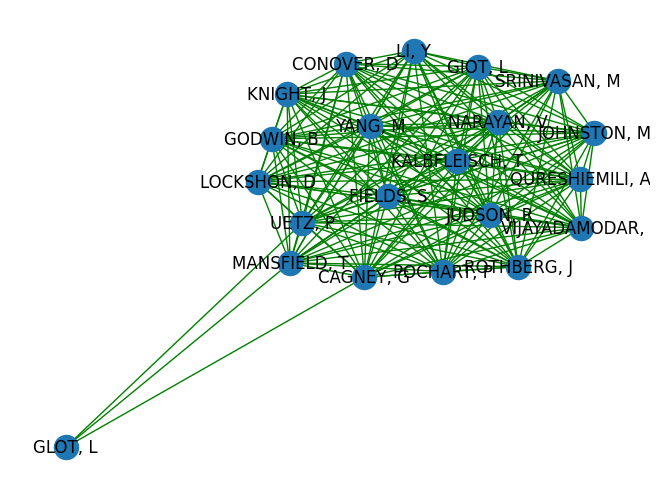

In [8]:
comp = G.subgraph(list(comps[idx]))
nx.draw_spring(comp, with_labels=True, edge_color='green')

Найдите с помощью networkx (см. [документацию](https://networkx.github.io/documentation/stable/reference/algorithms/clique.html)) размер максимальной клики в упомянутой выше 21-вершинной компоненте связности.

Размер максимальной клики - 20


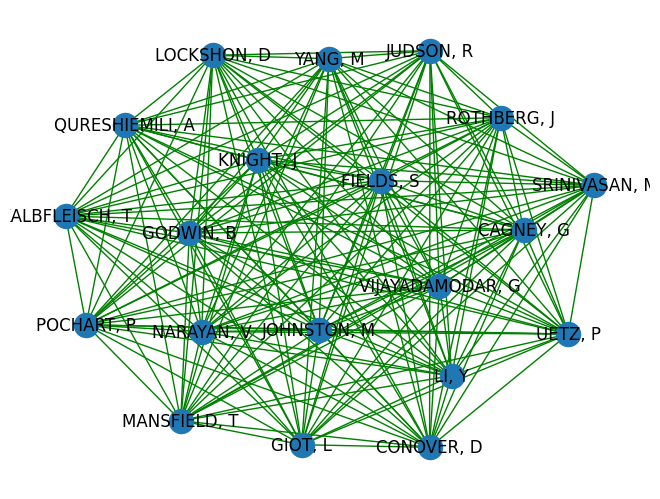

In [9]:
max_clique = sorted(nx.find_cliques(comp), key=len, reverse=True)[0]
print('Размер максимальной клики -', len(max_clique))
nx.draw_spring(G.subgraph(max_clique), with_labels=True, edge_color='green')

## Часть 2: построение графа

Создайте с нуля (только с помощью `add_nodes_from` и `add_edges_from`) граф типа `lollipop` (но без использования встроенной в `networkx` функции `lollipop_graph`) — клику на 10 вершинах, к которой приделана цепь на 6 вершинах. Нарисуйте этот граф наиболее подходящим по Вашему мнению алгоритмом, предоставляемым `networkx` — поэкспериментируйте.


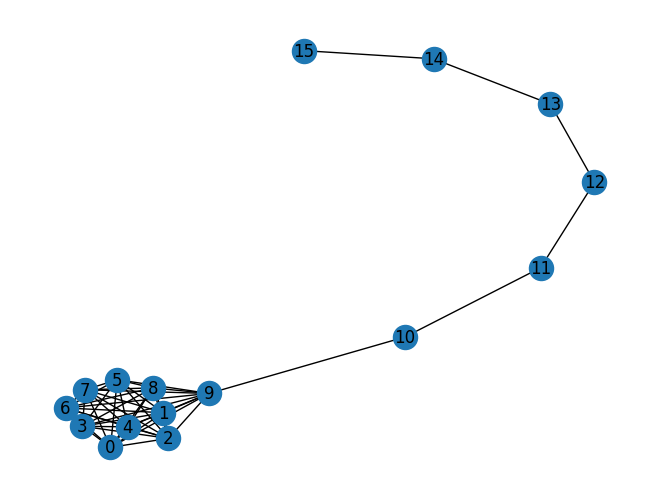

In [10]:
nodes = [i for i in range(10)]
clique = nx.Graph()
for i in range(len(nodes)):
    for j in range(i+1, len(nodes)):
        clique.add_edge(nodes[i], nodes[j])

route = nx.Graph()
for i in range(9, 15):
    route.add_edge(i, i+1)

g = nx.compose(clique, route)
nx.draw(g, with_labels=True)

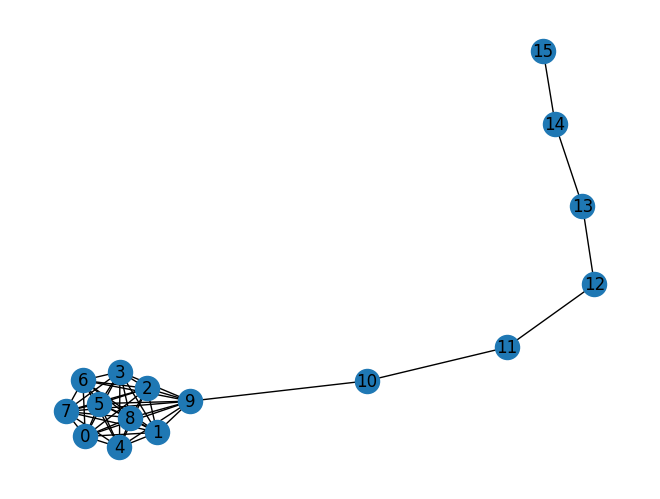

In [11]:
a = nx.lollipop_graph(10, 6)
nx.draw(a, with_labels=True)

Создайте граф, который получается из цикла на 10 вершинах добавлением одного ребра между какой-нибудь парой диаметрально противоположных вершин. Нарисуйте этот граф наиболее подходящим по Вашему мнению алгоритмом, предоставляемым networkx — поэкспериментируйте.

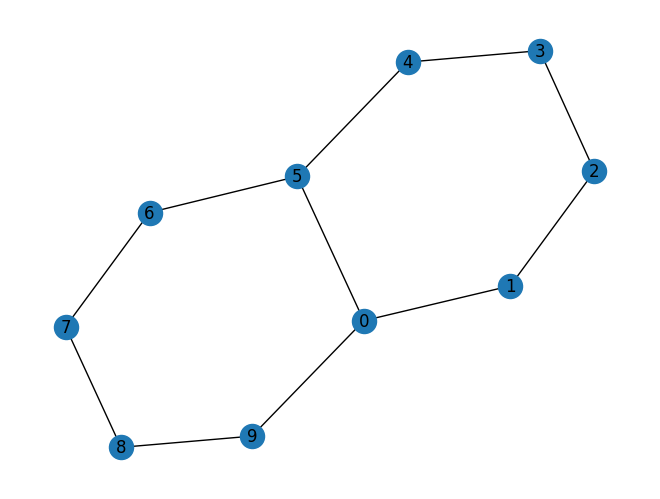

In [12]:
cycle = nx.cycle_graph(10)
cycle.add_edge(0, 5)
nx.draw(cycle, with_labels=True)

## Часть 3: жадный алгоритм раскраски

Найдите для заданного `networkx`-графа $G$ раскраску не более, чем в $\Delta(G)$ цветов с помощью рассказанного на лекции «жадного» алгоритма. Технически раскраска — это словарь, в котором для каждой вершины указан её номер цвета от $1$ до $\Delta(G)$.

In [13]:
def greedy_coloring(G):
    colors = [i for i in range(1, 100)]
    colors_of_nodes = {}
    for node in G.nodes():
        neighbor_colors = {colors_of_nodes[color] for color in G[node] if color in colors_of_nodes}
        for color in colors:
            if color not in neighbor_colors:
                break

        colors_of_nodes[node] = color

    return colors_of_nodes

In [14]:
G = nx.random_regular_graph(7, 500, 2020)
coloring = greedy_coloring(G)
assert (
    max(coloring.values()) <= 7
    and
    min(coloring.values()) >= 1
    and
    all(coloring[u] != coloring[v] for u,v in G.edges())
)